# This notebook demonstrates simple visualizations of codex data

In [1]:
%gui qt5

In [2]:
%matplotlib inline

In [3]:
import sys
import os
import skimage
import starspace
import napari
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [4]:
# !{sys.executable} -m pip install -e ..

Obtaining file:///Users/ajc/projects/chanzuckerberg/spatial-warehouse
    100% |████████████████████████████████| 37.4MB 846kB/s eta 0:00:01    74% |████████████████████████        | 28.0MB 45.6MB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 13.6MB/s ta 0:00:01


  Found existing installation: PyQt5-sip 4.19.15
    Uninstalling PyQt5-sip-4.19.15:
      Successfully uninstalled PyQt5-sip-4.19.15
  Found existing installation: PyQt5 5.12.1
    Uninstalling PyQt5-5.12.1:
      Successfully uninstalled PyQt5-5.12.1
  Found existing installation: starspace 0.0.1
    Uninstalling starspace-0.0.1:
      Successfully uninstalled starspace-0.0.1
  Running setup.py develop for starspace


## Load and display a field of view.

In [4]:
matrix_path = (
    '~/projects/chanzuckerberg/spatial-warehouse/starspace/conversion_examples/'
    'codex_goltsev_2018_cell_spleen.matrix.zarr'
)
matrix = starspace.Matrix.load_zarr(os.path.expanduser(matrix_path))

These data contain multiple samples and fields of view. Extract one, then view a field of view's niche IDs. Ideally, fields of view would be tiled so that they could be co-visualized, but we don't know the tiling pattern for this dataset. 

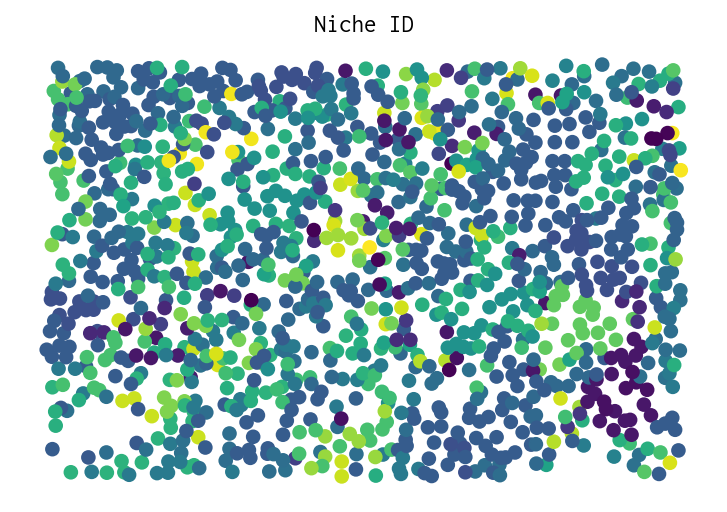

In [20]:
selector = (matrix.fov_x == 1) & (matrix.fov_y == 1) & (matrix.sample_type == "MRL-8")
fov = matrix.where(selector, drop=True)
f, ax = plt.subplots(dpi=150)
ax.scatter(fov.x_region, fov.y_region, c=fov.group_id)
ax.set_title("Niche ID")
ax.set_axis_off()

The data can also be visualized by gene expression values. The CD31+ cluster is likely a group of macrophages, based on coexpression of CD71. 

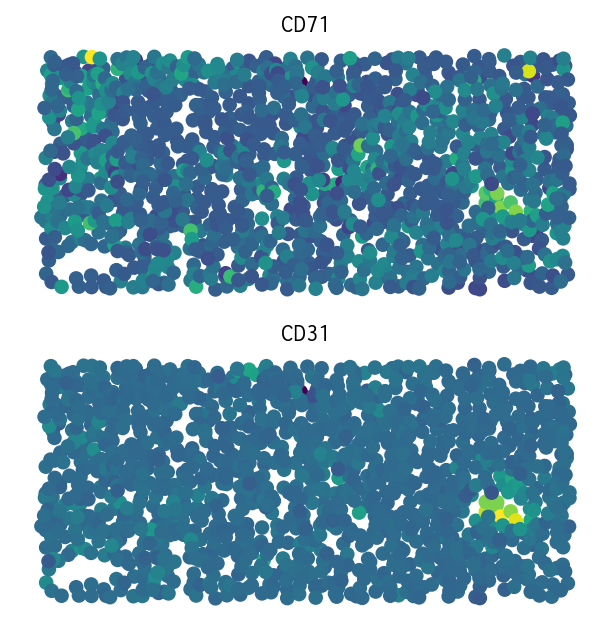

In [19]:
f, axes = plt.subplots(nrows=2, dpi=150, figsize=(5, 5))
for g, ax in zip(("CD71", "CD31"), axes):
    gene = np.ravel((fov.where(fov.gene_name == g, drop=True)))
    ax.scatter(fov.x_region, fov.y_region, c=gene)
    ax.set_title(g)
    ax.set_axis_off()

## Analyze in cellxgene

In [13]:
adata = matrix.to_anndata()

Note: codex requires different processing from traditional scanpy pipelines. What should we do here? 

In [14]:
adata.write_h5ad('codex_spleen.h5ad')

... storing 'biological_annotation' as categorical
... storing 'physical_annotation' as categorical
... storing 'channel' as categorical
